Exercise 1 : Exploratory Data Analysis

Instructions

Load the data from CSV files
Remove target column from the training data
Split the data intro train/test split
Understand the data

In [2]:
#Libraries
import pandas as pd
from skimpy import skim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [10]:
#Import of data
df = pd.read_csv('dataset_heart.csv')
print(df.head())
print(df.describe())
print(df.info())

df.loc[df['heart disease'] == 1, 'heart disease'] = 0
df.loc[df['heart disease'] == 2, 'heart disease'] = 1

#Display metrics with skimpy
skim(df)

#View unique values for integer features
# Select only integer columns
int_features = df.select_dtypes(include='int')

# Display unique value for label
print(df['heart disease'].value_counts().sort_index())
#Slight imbalance. No need for SMOTE.

#Remove target column from the training data
X = df.drop('heart disease', axis=1)
y = df['heart disease']

#Split the data intro train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  oldpeak  ST segment  major vessels

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 270    │ │ int64       │ 13    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column                   ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0   ┃ p25  ┃ p50    ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ age                      │   0 │     0 │    54.43 │    9.109 │   29 │   48 │     55 │   61 │   77 │ ▁▄▅█▅▁ │  │
│ │ sex                      │   0 │     0 │   0.6778 │   0.4682 │    0 │    0 │      1 │    1 │    1 │ ▄    █ │  │
│ │ chest pain type          │   0 │     0 │    3.174 │   0.9501 │    1 │    3 │      3 │    4 │    4 │ ▁ ▃ ▅█ │  │
│ │ resting blood pressure   │   0 │     0 │    131.3 │    17.86 │   94 │  120 │    130 │  140 │  200 │ ▃▇█▃▁  │  │
│ │ serum cholestoral        │   0 │     0 │    249.7 │    51.69 │  126 │  213 │    245 │  280 │  564 │  ▂█▄   │  │
│ │ fasting blood sugar      │   0 │     0 │   0.1481 │   0.3559 │    0 │    0 │      0 │    0 │    1 │ █    ▁ │  │
│ │ resting                  │   0 │     0 │    1.022 │   0.9979 │    0 │    0 │      2 │    2 │    2 │ █    █ │  │
│ │ electrocardiographic     │     │       │          │          │      │      │        │      │      │        │  │
│ │ results                  │     │       │          │          │      │      │        │      │      │        │  │
│ │ max heart rate           │   0 │     0 │    149.7 │    23.17 │   71 │  133 │  153.5 │  166 │  202 │  ▂▄▇█▁ │  │
│ │ exercise induced angina  │   0 │     0 │   0.3296 │    0.471 │    0 │    0 │      0 │    1 │    1 │ █    ▄ │  │
│ │ oldpeak                  │   0 │     0 │     1.05 │    1.145 │    0 │    0 │    0.8 │  1.6 │  6.2 │  █▄▁▁  │  │
│ │ ST segment               │   0 │     0 │    1.585 │   0.6144 │    1 │    1 │      2 │    2 │    3 │ █  █ ▁ │  │
│ │ major vessels            │   0 │     0 │   0.6704 │   0.9439 │    0 │    0 │      0 │    1 │    3 │ █ ▃ ▂▁ │  │
│ │ thal                     │   0 │     0 │    4.696 │    1.941 │    3 │    3 │      3 │    7 │    7 │ █   ▁▅ │  │
│ │ heart disease            │   0 │     0 │   0.4444 │   0.4978 │    0 │    0 │      0 │    1 │    1 │ █    ▆ │  │
│ └──────────────────────────┴─────┴───────┴──────────┴──────────┴──────┴──────┴────────┴──────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

heart disease
0    150
1    120
Name: count, dtype: int64


Exercise 2 : Logistic Regression Without Grid Search

Instructions

Use the dataset to build a logistic regression model without using grid search. Split the data into training and testing sets, then train a logistic regression model and evaluate its performance on the test set.

Accuracy:  0.9259259259259259
Intercept: [-8.37193105]
Coefficients: [[-0.01429762  1.04850362  0.64630167  0.0232621   0.00502708 -0.66792017
   0.09280945 -0.01157205  0.67140606  0.47673312  0.44194775  0.83722946
   0.32721774]]


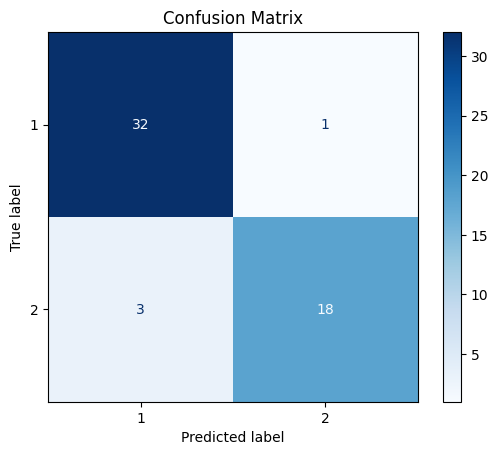

{'Precision': 0.9142857142857143, 'Recall': 0.9696969696969697, 'F1-score': 0.9411764705882353}


In [4]:
from sklearn.linear_model import LogisticRegression

#Train a logistic regression model
model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

#Evaluate its performance on the test set
#Accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
#Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Recall, precision, F1-score and comment the results.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
print(metrics)



Exercise 3 : Logistic Regression With Grid Search

Instructions

Build a logistic regression model using the dataset, but this time, use GridSearchCV to optimize the hyperparameters such as C and penalty.

Tuned Logistic Regression Parameters: {'C': np.float64(0.4393970560760795), 'penalty': 'l2'}
Best score is 0.8290697674418605
Accuracy:  0.9444444444444444
Intercept: [-7.1570791]
Coefficients: [[-0.01567868  0.77478297  0.60890271  0.02120628  0.00431331 -0.45832529
   0.10807444 -0.01353426  0.56009703  0.48015416  0.35619754  0.75992785
   0.34826882]]


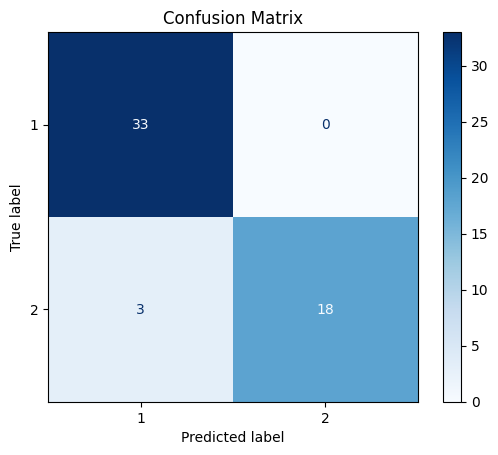

{'Precision': 0.9166666666666666, 'Recall': 1.0, 'F1-score': 0.9565217391304348}


In [5]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,
              'penalty': ['l2']
}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter= 10000)

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Assuming X and y are your feature matrix and target variable
# Fit the GridSearchCV object to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

#Evaluate its performance on the test set with best parameters
#Accuracy
from sklearn.metrics import accuracy_score
logreg_tuned = LogisticRegression(C= 0.4393970560760795, penalty= 'l2', max_iter= 1000)
logreg_tuned.fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
#Coefficients
print("Intercept:", logreg_tuned.intercept_)
print("Coefficients:", logreg_tuned.coef_)
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg_tuned, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Recall, precision, F1-score and comment the results.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
print(metrics)

Exercise 4 : SVM Without Grid Search

Instructions

Train a Support Vector Machine (SVM) classifier on the dataset without using grid search. Choose an appropriate kernel and set the hyperparameters manually.

Accuracy (SVC): 0.8703703703703703


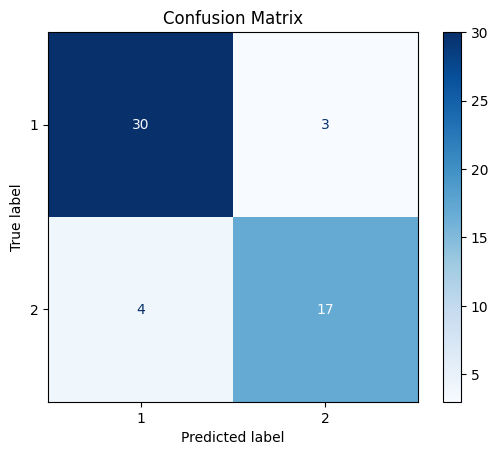

{'Precision': 0.9166666666666666, 'Recall': 1.0, 'F1-score': 0.9565217391304348}


In [6]:
from sklearn.svm import SVC

# Create and train the Support Vector Classifier
svc_model = SVC(C=1.5, kernel='linear', gamma= 'auto')
svc_model.fit(X_train, y_train)

# Make predictions on the test set
svc_y_pred = svc_model.predict(X_test)

# Calculate accuracy
svc_accuracy = accuracy_score(y_test, svc_y_pred)
print(f'Accuracy (SVC): {svc_accuracy}')

#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Recall, precision, F1-score and comment the results.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
print(metrics)

Exercise 5 : SVM With Grid Search

Instructions

Implement an SVM classifier on the dataset with GridSearchCV to find the best combination of C, kernel, and gamma hyperparameters.

In [7]:
# Creating the hyperparameter grid
c_space = np.logspace(0, 2, 5)
kernel= ['linear', 'rbf']
gamma= ['auto', 'scale']
param_grid = {'C': c_space,
              'kernel': kernel,
              'gamma': gamma
}
# Instantiating  Support Vector Classifier
svc_untuned = SVC()

# Instantiating the GridSearchCV object
svc_cv = GridSearchCV(svc_untuned, param_grid, cv=5)

# Assuming X and y are your feature matrix and target variable
# Fit the GridSearchCV object to the data
svc_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': np.float64(1.0), 'gamma': 'auto', 'kernel': 'linear'}
Best score is 0.8151162790697676


Accuracy:  0.8703703703703703


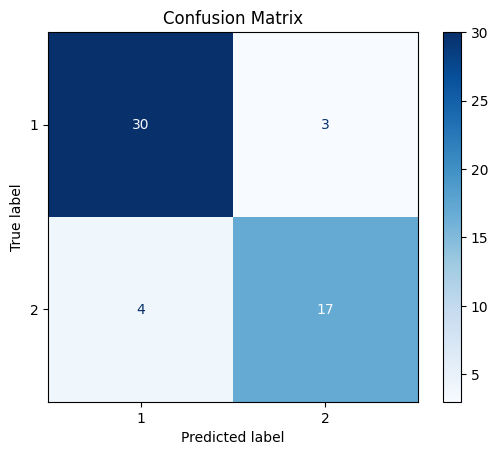

{'Precision': 0.8823529411764706, 'Recall': 0.9090909090909091, 'F1-score': 0.8955223880597015}


In [8]:
#Evaluate its performance on the test set with best parameters
#Accuracy
from sklearn.metrics import accuracy_score
svc_tuned = SVC(C= 1.0, gamma= 'auto', kernel= 'linear')
svc_tuned.fit(X_train, y_train)
y_pred = svc_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svc_tuned, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Recall, precision, F1-score and comment the results.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
print(metrics)

Exercise 6 : XGBoost Without Grid Search

Instructions

Use the dataset to train an XGBoost classifier without hyperparameter tuning. Set the hyperparameters manually and justify your choices.

Accuracy: 0.8148148148148148


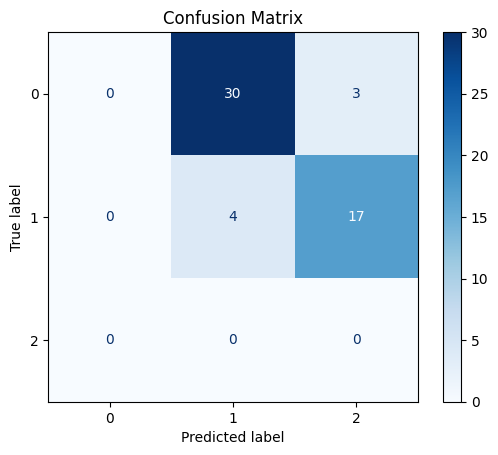

{'Precision': 0.7894736842105263, 'Recall': 0.7142857142857143, 'F1-score': 0.75}


In [12]:
from xgboost import XGBClassifier

# Create and train the XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Recall, precision, F1-score and comment the results.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
print(metrics)

Exercise 7 : XGBoost With Grid Search

Instructions

Train an XGBoost classifier on the dataset using GridSearchCV to optimize hyperparameters such as learning_rate, n_estimators, max_depth, etc.

In [15]:
# Creating the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
}
# Instantiating  Support Vector Classifier
xgb_untuned = XGBClassifier()

# Instantiating the GridSearchCV object
xgb_cv = GridSearchCV(xgb_untuned, param_grid, cv=5)

# Assuming X and y are your feature matrix and target variable
# Fit the GridSearchCV object to the data
xgb_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

Tuned Logistic Regression Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best score is 0.8199788583509513


Accuracy:  0.7592592592592593


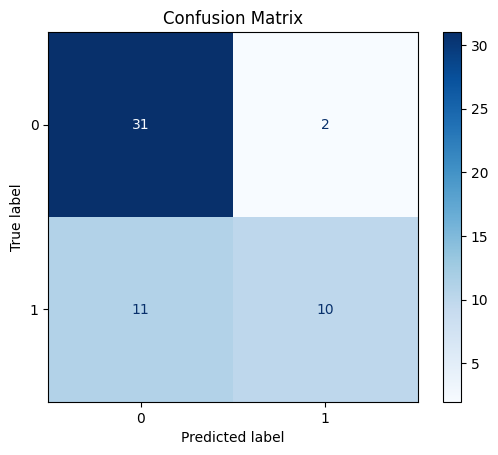

{'Precision': 0.8333333333333334, 'Recall': 0.47619047619047616, 'F1-score': 0.6060606060606061}


In [18]:
#Evaluate its performance on the test set with best parameters
#Accuracy
from sklearn.metrics import accuracy_score
xgb_tuned = XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 50)
xgb_tuned.fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_tuned, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Recall, precision, F1-score and comment the results.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}
print(metrics)